In [3]:
# Importamos las librerias
from tensorflow.keras.datasets import cifar100

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, Input, regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import AUC
from tensorflow.keras.losses import SparseCategoricalCrossentropy, MSE, MAE
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

from aux_func import show_history
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Distribuimos los datos para el modelo
(X_train, y_train), (X_validation, y_validation) = cifar100.load_data()

# Normalizamos
X_train = X_train/255
X_validation = X_validation/255

169017344/169001437 [==============================] - 4s 0us/step


In [23]:
print('Número de elementos en el dataset = ', X_train.shape[0]+X_validation.shape[0])

Número de elementos en el dataset =  60000


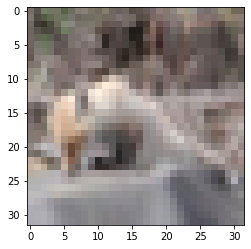

In [24]:
plt.imshow(X_train[8888])

## Red Neuronal


In [25]:
# capas de la red
input = Input(shape=(32,32,3))
input_flat = layers.Flatten()(input)
layer = layers.Dense(units=1000, activation='elu')(input_flat)
layer = layers.Dense(units=1000, activation='elu')(layer)
layer = layers.Dense(units=1000, activation='elu')(layer)
layer = layers.Dense(units=1000, activation='elu')(layer)
layer = layers.Dense(units=1000, activation='elu')(layer)
layer = layers.Dense(units=1000, activation='elu')(layer)
layer = layers.Dense(units=1000, activation='elu')(layer)
output = layers.Dense(units=100, activation='softmax')(layer)

# creamos el modelo
model = Model(inputs=input, outputs=output)
print(model.summary())

# optimizador
optimizer = SGD(learning_rate=0.001)

# función loss
loss = SparseCategoricalCrossentropy(from_logits=False)

# métrica
metrics = ['accuracy']

# compilamos el modelo
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1000)              3073000   
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_3 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_4 (Dense)             (None, 1000)              100100

In [ ]:
history = model.fit(x=X_train, y=y_train, batch_size=100, epochs=100,
                           validation_data=(X_validation, y_validation))

Resultados Red Neuronal:

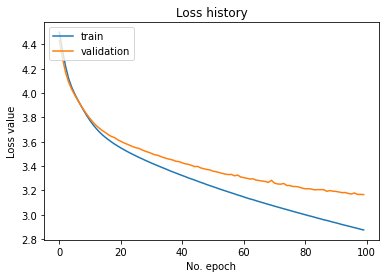

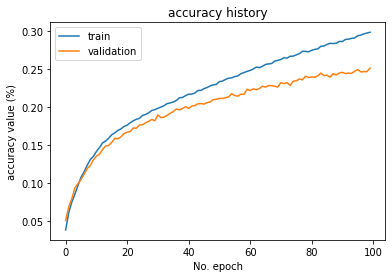

In [28]:
show_history(history)

## Random Forest

Iteramos y visualizamos los resultados de los random forest. Por tiempo de computación se comprueban solo desde el valor 1 hasta el 10. Pero se podría cambiar el valor al deseado para seguir computando y haciendo pruebas.

In [ ]:
iteration = []
accuracy = []

for i in np.arange(1,20,1):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train.reshape((X_train.shape[0],-1)), y_train.reshape((-1,1)))
    iteration.append(i)
    accuracy.append(clf.score(X_validation.reshape((X_validation.shape[0],-1)), y_validation.reshape((-1,1))))

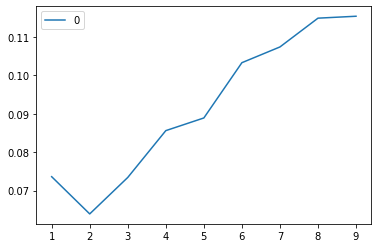

In [30]:
results = pd.DataFrame(accuracy, iteration)
plt.title('Resultados RF por Número de Árboles')
plt.xlabel('Arboles')
plt.ylabel('Score')
results.plot()

Observamos que el resultado del score es menor que la red neuronal.\
Cambiamos el número de árboles para comprobar si podemos mejorar el resultado:

## SGD Classifier

In [13]:
sgd = SGDClassifier(loss='hinge', penalty='l2', max_iter=100, verbose=0, n_jobs=10)
sgd.fit(X_train.reshape((X_train.shape[0],-1)), y_train.reshape((-1,1)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


SGDClassifier(max_iter=100, n_jobs=10)

In [14]:
print(sgd.score(X_validation.reshape((X_validation.shape[0],-1)), y_validation.reshape((-1,1))))

0.0993


## Logistic Regression


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression(random_state=0).fit(X_train.reshape((X_train.shape[0],-1)), y_train.reshape((-1,1)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [27]:
print(clf.score(X_validation.reshape((X_validation.shape[0],-1)), y_validation.reshape((-1,1))))

0.1804
